# Load Dataset

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [48]:
import pandas as pd
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset info
接下来我们查看数据的详细信息，首先是查看各列属性中是否有空值 `NULL`

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


可以看到，`Gender`，`Married`，`Dependents`，`Self_Employed`，`LoanAmount`，`Loan_Amount_Term`，`Credit_History` 这些数据是含有空值的，接下来将所有含有空值的数据清除，查看还剩多少完整的数据

In [50]:
df_no_null = df.dropna(axis=0, inplace=False)
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


可以看到，一共有 480 个完整的数据信息，这个可以作为训练时的备选数据集

# Data Cleaning
看到这些不完整的信息，接下来要做的就是去除这些含有空值的信息，首先先把无用的 ID 属性删除

In [51]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

在这里，我们为所有数据加入 `bias` 为 1。

In [52]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
dataset_no_null = df.dropna(axis=0, inplace=False)
dataset_no_null.insert(loc=0, column='Bias', value=1)   # Bias

若采用相邻的值替代空值，则可以得到一个新的比较完整的数据集

In [53]:
dataset_full = df.copy()
dataset_full = dataset_full.fillna(method='bfill', axis=0)
dataset_full.insert(loc=0, column='Bias', value=1)
dataset_full.head()

,Bias,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encode
将所有类型特征转化为数值特征，对其进行顺序编码

In [54]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})

def encodingFeatures(dataset):
    dataset.Gender = dataset.Gender.map({'Female': 0, 'Male': 1})
    dataset.Married = dataset.Married.map({'No': 0, 'Yes': 1})
    dataset.Dependents = dataset.Dependents.map({'0': 0, '1': 1, '2': 2, '3+': 3})
    dataset.Education = dataset.Education.map({'Not Graduate': 0, 'Graduate': 1})
    dataset.Self_Employed = dataset.Self_Employed.map({'No': 0, 'Yes': 1})
    dataset.Property_Area = dataset.Property_Area.map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
    dataset.Loan_Status = dataset.Loan_Status.map({'N': 0, 'Y': 1})

encodingFeatures(dataset=dataset_no_null)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
dataset_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bias               480 non-null    int64  
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 52.5 KB


In [56]:
encodingFeatures(dataset=dataset_full)
dataset_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bias               614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


# Data Process

In [57]:
print(dataset_no_null.Loan_Status.value_counts())
print(dataset_full.Loan_Status.value_counts())

1    332
0    148
Name: Loan_Status, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


从上面这里可以看出，目前清除空值的数据集正样例的比率大约为 0.692，而较完整数据集的正样例比率约为 0.687。接下来对输入的数据向量进行归一化，这里只对变化范围大的特征进行处理，即对 `ApplicantIncome`，`CoapplicantIncome`，`LoanAmount`，`Loan_Amount_Term` 进行处理，然后采用不同方法划分数据集，在这里我先采用留出法划分 **1** 次数据集

In [58]:
import numpy as np
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization


def featuresNorm(dataset):
    dataset.ApplicantIncome /= np.linalg.norm(dataset.ApplicantIncome)
    dataset.CoapplicantIncome /= np.linalg.norm(dataset.CoapplicantIncome)
    dataset.LoanAmount /= np.linalg.norm(dataset.LoanAmount)
    dataset.Loan_Amount_Term /= np.linalg.norm(dataset.Loan_Amount_Term)


def datasetSplit(dataset, frac, random_state):
    # 采用随机取样
    # 设置 random_state 是为了确保每次抽样都能得到相同的随机样本
    dataset_train = dataset.sample(frac=frac, random_state=random_state)
    dataset_test = dataset[~dataset.index.isin(dataset_train.index)]
    X_train = dataset_train.drop('Loan_Status', axis=1, inplace=False)
    Y_train = dataset_train.Loan_Status
    X_test = dataset_test.drop('Loan_Status', axis=1, inplace=False)
    Y_test = dataset_test.Loan_Status
    return X_train, Y_train, X_test, Y_test

dataset_no_norm = dataset_no_null.copy()
featuresNorm(dataset_no_null)
X_train_no_null, Y_train_no_null, X_test_no_null, Y_test_no_null = datasetSplit(dataset_no_null, 0.8, 1)


同时也将较完整的数据集进行 **1** 次数据划分

In [59]:
dataset_full_no_norm = dataset_full.copy()
featuresNorm(dataset_full)
X_train_full, Y_train_full, X_test_full, Y_test_full = datasetSplit(dataset_full, 0.8, 1)

这里再次用留出法进行多次划分得到多个不同训练集和验证集，留作备用分析

In [60]:
X_train_no_null2, Y_train_no_null2, X_test_no_null2, Y_test_no_null2 = datasetSplit(dataset_no_null, 0.8, 2)
X_train_no_null3, Y_train_no_null3, X_test_no_null3, Y_test_no_null3 = datasetSplit(dataset_no_null, 0.8, 3)
X_train_no_null4, Y_train_no_null4, X_test_no_null4, Y_test_no_null4 = datasetSplit(dataset_no_null, 0.8, 4)
X_train_no_null5, Y_train_no_null5, X_test_no_null5, Y_test_no_null5 = datasetSplit(dataset_no_null, 0.8, 5)

In [61]:
X_train_full2, Y_train_full2, X_test_full2, Y_test_full2 = datasetSplit(dataset_full, 0.8, 2)
X_train_full3, Y_train_full3, X_test_full3, Y_test_full3 = datasetSplit(dataset_full, 0.8, 3)
X_train_full4, Y_train_full4, X_test_full4, Y_test_full4 = datasetSplit(dataset_full, 0.8, 4)
X_train_full5, Y_train_full5, X_test_full5, Y_test_full5 = datasetSplit(dataset_full, 0.8, 5)
X_train_full6, Y_train_full6, X_test_full6, Y_test_full6 = datasetSplit(dataset_full, 0.8, 3406)
X_train_full7, Y_train_full7, X_test_full7, Y_test_full7 = datasetSplit(dataset_full, 0.8, 3407)
X_train_full8, Y_train_full8, X_test_full8, Y_test_full8 = datasetSplit(dataset_full, 0.8, 3408)
X_train_full9, Y_train_full9, X_test_full9, Y_test_full9 = datasetSplit(dataset_full, 0.8, 3409)

同时也为没有做归一化的除去空值的数据集划分数据集

In [62]:
X_train_no_norm1, Y_train_no_norm1, X_test_no_norm1, Y_test_no_norm1 = datasetSplit(dataset_no_norm, 0.8, 3405)
X_train_no_norm2, Y_train_no_norm2, X_test_no_norm2, Y_test_no_norm2 = datasetSplit(dataset_no_norm, 0.8, 3406)
X_train_no_norm3, Y_train_no_norm3, X_test_no_norm3, Y_test_no_norm3 = datasetSplit(dataset_no_norm, 0.8, 3407)
X_train_no_norm4, Y_train_no_norm4, X_test_no_norm4, Y_test_no_norm4 = datasetSplit(dataset_no_norm, 0.8, 3408)
X_train_no_norm5, Y_train_no_norm5, X_test_no_norm5, Y_test_no_norm5 = datasetSplit(dataset_no_norm, 0.8, 3409)

# Train

7629


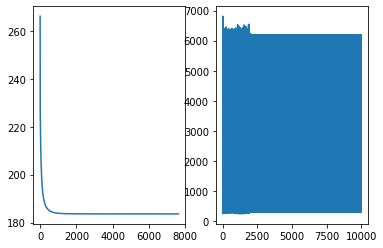

In [63]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training

model1_1 = LogisticRegression()
model1_1.fit(X_train_no_null, Y_train_no_null, lr=0.001, tol=1e-4, max_iter=1e4)

plt.subplot(1, 2, 1)
plt.plot(model1_1.train_loss)

model1_2 = LogisticRegression()
model1_2.fit(X_train_no_null, Y_train_no_null, lr=0.05, tol=1e-4, max_iter=1e4)

plt.subplot(1, 2, 2)
plt.plot(model1_2.train_loss)

可以分析出，如果梯度下降法的学习速率低，可以迅速的达到收敛状态；而学习速率大的情况下，训练过程中无法达到收敛状态，原因可能是因为梯度变化过大，导致权重在局部最优值左右往返，导致其无法收敛

然后我们对备用的除去空值的数据集进行训练验证

7116
7601
7838
6777


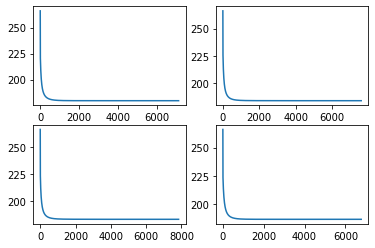

In [64]:
# 低学习率的训练
model2_1 = LogisticRegression()
model2_1.fit(X_train_no_null2, Y_train_no_null2, lr=0.001, tol=1e-4, max_iter=1e4)
model3_1 = LogisticRegression()
model3_1.fit(X_train_no_null3, Y_train_no_null3, lr=0.001, tol=1e-4, max_iter=1e4)
model4_1 = LogisticRegression()
model4_1.fit(X_train_no_null4, Y_train_no_null4, lr=0.001, tol=1e-4, max_iter=1e4)
model5_1 = LogisticRegression()
model5_1.fit(X_train_no_null5, Y_train_no_null5, lr=0.001, tol=1e-4, max_iter=1e4)

plt.subplot(2, 2, 1)
plt.plot(model2_1.train_loss)
plt.subplot(2, 2, 2)
plt.plot(model3_1.train_loss)
plt.subplot(2, 2, 3)
plt.plot(model4_1.train_loss)
plt.subplot(2, 2, 4)
plt.plot(model5_1.train_loss)

除去空值的数据集在高学习率的情况下训练

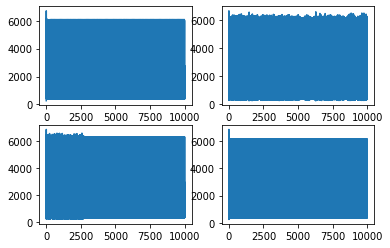

In [65]:
# 高学习率的训练
model2_2 = LogisticRegression()
model2_2.fit(X_train_no_null2, Y_train_no_null2, lr=0.05, tol=1e-4, max_iter=1e4)
model3_2 = LogisticRegression()
model3_2.fit(X_train_no_null3, Y_train_no_null3, lr=0.05, tol=1e-4, max_iter=1e4)
model4_2 = LogisticRegression()
model4_2.fit(X_train_no_null4, Y_train_no_null4, lr=0.05, tol=1e-4, max_iter=1e4)
model5_2 = LogisticRegression()
model5_2.fit(X_train_no_null5, Y_train_no_null5, lr=0.05, tol=1e-4, max_iter=1e4)

plt.subplot(2, 2, 1)
plt.plot(model2_2.train_loss)
plt.subplot(2, 2, 2)
plt.plot(model3_2.train_loss)
plt.subplot(2, 2, 3)
plt.plot(model4_2.train_loss)
plt.subplot(2, 2, 4)
plt.plot(model5_2.train_loss)

当正则项选择的是 `l1` 的情况下进行训练

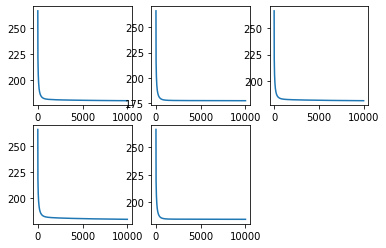

In [66]:
# 正则项为 l1 的情况下训练 
model1_3 = LogisticRegression(penalty='l1')
model1_3.fit(X_train_no_null, Y_train_no_null, lr=0.001, tol=1e-4, max_iter=1e4)
model2_3 = LogisticRegression(penalty='l1')
model2_3.fit(X_train_no_null2, Y_train_no_null2, lr=0.001, tol=1e-4, max_iter=1e4)
model3_3 = LogisticRegression(penalty='l1')
model3_3.fit(X_train_no_null3, Y_train_no_null3, lr=0.001, tol=1e-4, max_iter=1e4)
model4_3 = LogisticRegression(penalty='l1')
model4_3.fit(X_train_no_null4, Y_train_no_null4, lr=0.001, tol=1e-4, max_iter=1e4)
model5_3 = LogisticRegression(penalty='l1')
model5_3.fit(X_train_no_null5, Y_train_no_null5, lr=0.001, tol=1e-4, max_iter=1e4)

plt.subplot(2, 3, 1)
plt.plot(model1_3.train_loss)
plt.subplot(2, 3, 2)
plt.plot(model2_3.train_loss)
plt.subplot(2, 3, 3)
plt.plot(model3_3.train_loss)
plt.subplot(2, 3, 4)
plt.plot(model4_3.train_loss)
plt.subplot(2, 3, 5)
plt.plot(model5_3.train_loss)

接下来在较完整的数据集上进行训练

7769


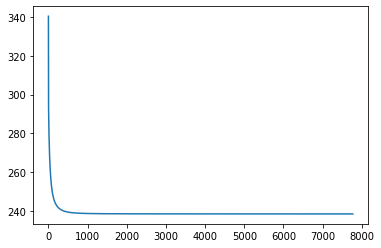

In [67]:
# 完整数据集的训练
model_full = LogisticRegression()
model_full.fit(X_train_full, Y_train_full, lr=0.001, tol=1e-4, max_iter=1e4)
plt.plot(model_full.train_loss)
plt.savefig("loss_curve.png")

并测试其他完整数据集

7921
7668
7973
7876
8094
8079
7836
8116


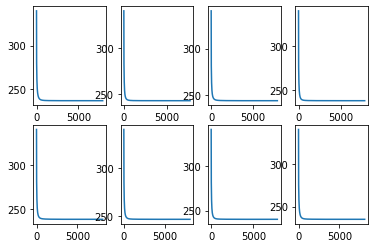

In [68]:
# 剩余完整数据集的训练
model_full2 = LogisticRegression()
model_full2.fit(X_train_full2, Y_train_full2, lr=0.001, tol=1e-4, max_iter=1e4)
model_full3 = LogisticRegression()
model_full3.fit(X_train_full3, Y_train_full3, lr=0.001, tol=1e-4, max_iter=1e4)
model_full4 = LogisticRegression()
model_full4.fit(X_train_full4, Y_train_full4, lr=0.001, tol=1e-4, max_iter=1e4)
model_full5 = LogisticRegression()
model_full5.fit(X_train_full5, Y_train_full5, lr=0.001, tol=1e-4, max_iter=1e4)
model_full6 = LogisticRegression()
model_full6.fit(X_train_full6, Y_train_full6, lr=0.001, tol=1e-4, max_iter=1e4)
model_full7 = LogisticRegression()
model_full7.fit(X_train_full7, Y_train_full7, lr=0.001, tol=1e-4, max_iter=1e4)
model_full8 = LogisticRegression()
model_full8.fit(X_train_full8, Y_train_full8, lr=0.001, tol=1e-4, max_iter=1e4)
model_full9 = LogisticRegression()
model_full9.fit(X_train_full9, Y_train_full9, lr=0.001, tol=1e-4, max_iter=1e4)

plt.subplot(2, 4, 1)
plt.plot(model_full2.train_loss)
plt.subplot(2, 4, 2)
plt.plot(model_full3.train_loss)
plt.subplot(2, 4, 3)
plt.plot(model_full4.train_loss)
plt.subplot(2, 4, 4)
plt.plot(model_full5.train_loss)
plt.subplot(2, 4, 5)
plt.plot(model_full6.train_loss)
plt.subplot(2, 4, 6)
plt.plot(model_full7.train_loss)
plt.subplot(2, 4, 7)
plt.plot(model_full8.train_loss)
plt.subplot(2, 4, 8)
plt.plot(model_full9.train_loss)

最后为没有进行归一化的数据进行训练

In [79]:
model1_4 = LogisticRegression()
model1_4.fit(X_train_no_norm1, Y_train_no_norm1, lr=0.001, tol=1e-4, max_iter=1e4)
model2_4 = LogisticRegression()
model2_4.fit(X_train_no_norm2, Y_train_no_norm2, lr=0.001, tol=1e-4, max_iter=1e4)
model3_4 = LogisticRegression()
model3_4.fit(X_train_no_norm3, Y_train_no_norm3, lr=0.001, tol=1e-4, max_iter=1e4)
model4_4 = LogisticRegression()
model4_4.fit(X_train_no_norm4, Y_train_no_norm4, lr=0.001, tol=1e-4, max_iter=1e4)
model5_4 = LogisticRegression()
model5_4.fit(X_train_no_norm5, Y_train_no_norm5, lr=0.001, tol=1e-4, max_iter=1e4)


这里因为数据没有做归一化，导致误差非常大，所以在计算损失函数的时候发生了溢出

# Test
接下来对上述训练好的模型进行验证，并且计算在验证集上的精确性为多少

In [70]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with

def categoryPoint5(y):
    return 1 if y >= 0.5 else 0

def accuracyCaculate(model, X_test, Y_test, category=None):
    pred = model.predict(X_test)
    if category is None:
        category = categoryPoint5
    count = 0
    for (y_pred, y_test) in zip(pred, Y_test):
        count = count + (1 if category(y_pred) == y_test else 0)
    accuracy = count / len(Y_test)
    return accuracy


In [71]:
accuracy1_1 = accuracyCaculate(model1_1, X_test_no_null, Y_test_no_null)
accuracy1_2 = accuracyCaculate(model1_2, X_test_no_null, Y_test_no_null)
print("accuracy with low learning rate is {}, while with high learning rate is {}".format(accuracy1_1, accuracy1_2))


accuracy with low learning rate is 0.8125, while with high learning rate is 0.7083333333333334


计算备用数据集下的准确率，得到总体的平均准确率

In [72]:
# 在低学习率的情况下预测
accuracy2 = accuracyCaculate(model2_1, X_test_no_null2, Y_test_no_null2)
accuracy3 = accuracyCaculate(model3_1, X_test_no_null3, Y_test_no_null3)
accuracy4 = accuracyCaculate(model4_1, X_test_no_null4, Y_test_no_null4)
accuracy5 = accuracyCaculate(model5_1, X_test_no_null5, Y_test_no_null5)

print("accuracy with different train and test dataset are {}, {}, {}, {} respectively".format(accuracy2, accuracy3, accuracy4, accuracy5))

accuracy = (accuracy1_1 + accuracy2 + accuracy3 + accuracy4 + accuracy5) / 5
print("the average accuracy with low learning rate is {}".format(accuracy))

accuracy with different train and test dataset are 0.78125, 0.8229166666666666, 0.8020833333333334, 0.8229166666666666 respectively
the average accuracy with low learning rate is 0.8083333333333333


在高学习率的情况下预测

In [73]:
# 在高学习率的情况下预测
accuracy2 = accuracyCaculate(model2_2, X_test_no_null2, Y_test_no_null2)
accuracy3 = accuracyCaculate(model3_2, X_test_no_null3, Y_test_no_null3)
accuracy4 = accuracyCaculate(model4_2, X_test_no_null4, Y_test_no_null4)
accuracy5 = accuracyCaculate(model5_2, X_test_no_null5, Y_test_no_null5)

print("accuracy with different train and test dataset are {}, {}, {}, {} respectively".format(accuracy2, accuracy3, accuracy4, accuracy5))

accuracy = (accuracy1_2 + accuracy2 + accuracy3 + accuracy4 + accuracy5) / 5
print("the average accuracy with high learning rate is {}".format(accuracy))

accuracy with different train and test dataset are 0.6458333333333334, 0.7604166666666666, 0.7708333333333334, 0.34375 respectively
the average accuracy with high learning rate is 0.6458333333333334


在正则项为 `l1` 的情况下预测

In [74]:
# 在正则项为 l1 的情况下预测
accuracy1_3 = accuracyCaculate(model1_3, X_test_no_null, Y_test_no_null)
accuracy2 = accuracyCaculate(model2_3, X_test_no_null2, Y_test_no_null2)
accuracy3 = accuracyCaculate(model3_3, X_test_no_null3, Y_test_no_null3)
accuracy4 = accuracyCaculate(model4_3, X_test_no_null4, Y_test_no_null4)
accuracy5 = accuracyCaculate(model5_3, X_test_no_null5, Y_test_no_null5)

print("accuracy with different train and test dataset are {}, {}, {}, {}, {} respectively"
.format(accuracy1_3, accuracy2, accuracy3, accuracy4, accuracy5))

accuracy = (accuracy1_3 + accuracy2 + accuracy3 + accuracy4 + accuracy5) / 5
print("the average accuracy with l1 is {}".format(accuracy))

accuracy with different train and test dataset are 0.8125, 0.78125, 0.8229166666666666, 0.8020833333333334, 0.8229166666666666 respectively
the average accuracy with l1 is 0.8083333333333333


在没有进行归一化的情况下进行预测

In [80]:
accuracy1 = accuracyCaculate(model1_4, X_test_no_norm1, Y_test_no_norm1)
accuracy2 = accuracyCaculate(model2_4, X_test_no_norm2, Y_test_no_norm2)
accuracy3 = accuracyCaculate(model3_4, X_test_no_norm3, Y_test_no_norm3)
accuracy4 = accuracyCaculate(model4_4, X_test_no_norm4, Y_test_no_norm4)
accuracy5 = accuracyCaculate(model5_4, X_test_no_norm5, Y_test_no_norm5)

print("accuracy with different train and test dataset are {}, {}, {}, {}, {} respectively"
.format(accuracy1, accuracy2, accuracy3, accuracy4, accuracy5))

accuracy = (accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5) / 5
print("the average accuracy with no normaliztion dataset is {}".format(accuracy))

accuracy with different train and test dataset are 0.71875, 0.6666666666666666, 0.2916666666666667, 0.25, 0.28125 respectively
the average accuracy with no normaliztion dataset is 0.4416666666666666


计算在较完整数据集上的准确率

In [76]:
# 完整数据集上低学习率的预测
accuracy_full = accuracyCaculate(model_full, X_test_full, Y_test_full)
accuracy_full2 = accuracyCaculate(model_full2, X_test_full2, Y_test_full2)
accuracy_full3 = accuracyCaculate(model_full3, X_test_full3, Y_test_full3)
accuracy_full4 = accuracyCaculate(model_full4, X_test_full4, Y_test_full4)
accuracy_full5 = accuracyCaculate(model_full5, X_test_full5, Y_test_full5)
accuracy_full6 = accuracyCaculate(model_full6, X_test_full6, Y_test_full6)
accuracy_full7 = accuracyCaculate(model_full7, X_test_full7, Y_test_full7)
accuracy_full8 = accuracyCaculate(model_full8, X_test_full8, Y_test_full8)
accuracy_full9 = accuracyCaculate(model_full9, X_test_full9, Y_test_full9)

print(accuracy_full2, accuracy_full3, accuracy_full4, accuracy_full5,
      accuracy_full6, accuracy_full7, accuracy_full8, accuracy_full9)

average_accuracy_full = (accuracy_full + accuracy_full2 + accuracy_full3 + accuracy_full4
                         + accuracy_full5 + accuracy_full6 + accuracy_full7 + accuracy_full8 + accuracy_full9) / 9
print("the average accuracy is {}".format(average_accuracy_full))

0.7886178861788617 0.8130081300813008 0.8292682926829268 0.7967479674796748 0.8130081300813008 0.8455284552845529 0.8048780487804879 0.7886178861788617
the average accuracy is 0.8093947606142728


如果对分类时采用的是以实际中占比进行分类，而不是采用 0.5 这个概率来区分正负样例，则接下来对其进行预测

In [77]:
def categoryRelative1(y):
    return 1 if y >= 0.692 else 0

def categoryRelative2(y):
    return 1 if y >= 0.687 else 0

# 除去空值的数据集在预测阈值为0.692的情况下预测
rel_acc1 = accuracyCaculate(model1_1, X_test_no_null, Y_test_no_null, categoryRelative1)
rel_acc2 = accuracyCaculate(model2_1, X_test_no_null2, Y_test_no_null2, categoryRelative1)
rel_acc3 = accuracyCaculate(model3_1, X_test_no_null3, Y_test_no_null3, categoryRelative1)
rel_acc4 = accuracyCaculate(model4_1, X_test_no_null4, Y_test_no_null4, categoryRelative1)
rel_acc5 = accuracyCaculate(model5_1, X_test_no_null5, Y_test_no_null5, categoryRelative1)

print("relative accuracy with different train and test dataset is {}, {}, {}, {}, {} respectively"
    .format(rel_acc1, rel_acc2, rel_acc3, rel_acc4, rel_acc5))

relative_accuracy = (rel_acc1 + rel_acc2 + rel_acc3 + rel_acc4 + rel_acc5) / 5
print("the relative average accuracy is {}".format(relative_accuracy))

relative accuracy with different train and test dataset is 0.7708333333333334, 0.7708333333333334, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334 respectively
the relative average accuracy is 0.7875


In [78]:
# 完整数据集在预测阈值为0.687的情况下预测
accuracy_full = accuracyCaculate(model_full, X_test_full, Y_test_full, categoryRelative2)
accuracy_full2 = accuracyCaculate(model_full2, X_test_full2, Y_test_full2, categoryRelative2)
accuracy_full3 = accuracyCaculate(model_full3, X_test_full3, Y_test_full3, categoryRelative2)
accuracy_full4 = accuracyCaculate(model_full4, X_test_full4, Y_test_full4, categoryRelative2)
accuracy_full5 = accuracyCaculate(model_full5, X_test_full5, Y_test_full5, categoryRelative2)
accuracy_full6 = accuracyCaculate(model_full6, X_test_full6, Y_test_full6, categoryRelative2)
accuracy_full7 = accuracyCaculate(model_full7, X_test_full7, Y_test_full7, categoryRelative2)
accuracy_full8 = accuracyCaculate(model_full8, X_test_full8, Y_test_full8, categoryRelative2)
accuracy_full9 = accuracyCaculate(model_full9, X_test_full9, Y_test_full9, categoryRelative2)

print(accuracy_full, accuracy_full2, accuracy_full3, accuracy_full4, accuracy_full5,
      accuracy_full6, accuracy_full7, accuracy_full8, accuracy_full9)

average_accuracy_full = (accuracy_full + accuracy_full2 + accuracy_full3 + accuracy_full4
                         + accuracy_full5 + accuracy_full6 + accuracy_full7 + accuracy_full8 + accuracy_full9) / 9

print("the relative average accuracy is {}".format(average_accuracy_full))

0.7560975609756098 0.7723577235772358 0.8048780487804879 0.7886178861788617 0.7560975609756098 0.7073170731707317 0.8373983739837398 0.7804878048780488 0.7479674796747967
the relative average accuracy is 0.7723577235772356
